In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import matplotlib as mpl
import xarray as xr

In [10]:
truth = np.load('inputfiles/stage1/y/Y_2019.npy')  #truth (y input file)
stage1 = np.load('outputs/test_unet_598617/stage1_output/pred_X_2019.npy')  #stage 1 prediction
stage2 = np.load('outputs/test_unet_598617/stage2_output/pred_X_2019.npy')  #stage 2 prediction

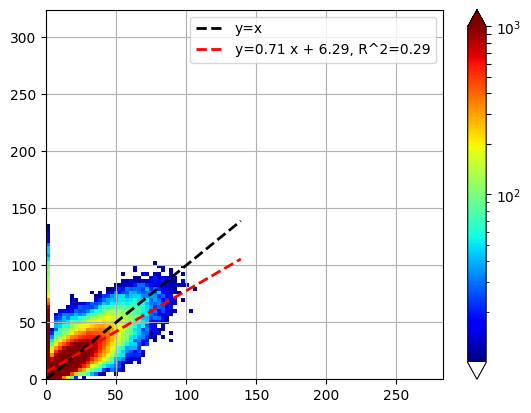

In [65]:
#adapted from phase1_evaluate.ipynb

truths = truth.flatten()
preds = stage1.flatten()

slope, intercept, r_value, p_value, std_err = linregress(truths, preds)

xx = np.arange(0, 140, 1)

fig = plt.figure()

my_cmap = plt.cm.jet
my_cmap.set_under('w', 1)

plt.hist2d(truths, preds, bins=100, norm=mpl.colors.LogNorm(vmax=1000, vmin=10), cmap=plt.cm.jet)
# plt.xlim((0, 20))
# plt.ylim((0, 20))
plt.plot(xx, xx, 'k--', lw=2, label='y=x')

plt.plot(xx, slope*xx+intercept, 'r--', lw=2, label='y=%.2f x + %.2f, R^2=%.2f'%(slope, intercept, r_value**2))

plt.colorbar(extend='both', ticks=[0.1, 0] + list(range(0, 1100, 100)) )
plt.legend()
plt.grid()


In [14]:
stage1.shape

(364, 56, 120, 1)

In [17]:
lats = np.load('lats.npy')
lons = np.load('lons.npy')

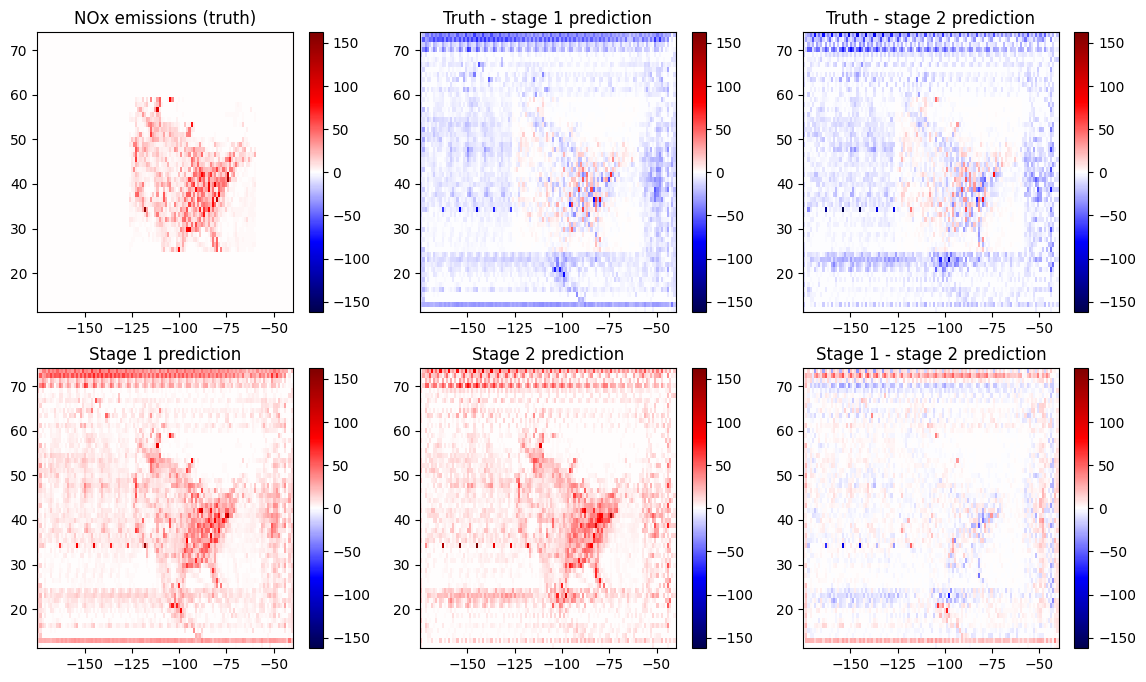

In [130]:
#plot maps of emissions, predictions, and differences

fig, ax = plt.subplots(2,3,figsize=(14,8))
vmin = np.min(np.concatenate([truth,stage1,stage2]))
vmax = np.max(np.concatenate([truth,stage1,stage2]))
halfrange = np.max(np.abs([vmin,vmax]))/2

day = 200  #day of the year to look at
plt.sca(ax[0,0])
plt.pcolormesh(lons,lats,truth[day,:,:,0],cmap=plt.cm.seismic,norm=mpl.colors.CenteredNorm(halfrange=halfrange))  
plt.title('NOx emissions (truth)')
plt.colorbar()
plt.sca(ax[0,1])
plt.pcolormesh(lons,lats,truth[day,:,:,0]-stage1[day,:,:,0],norm=mpl.colors.CenteredNorm(halfrange=halfrange),cmap=plt.cm.seismic)  
plt.title('Truth - stage 1 prediction')
plt.colorbar()
plt.sca(ax[0,2])
plt.pcolormesh(lons,lats,truth[day,:,:,0]-stage2[day,:,:,0],norm=mpl.colors.CenteredNorm(halfrange=halfrange),cmap=plt.cm.seismic)  
plt.title('Truth - stage 2 prediction')
plt.colorbar()
plt.sca(ax[1,0])
plt.pcolormesh(lons,lats,stage1[day,:,:,0],cmap=plt.cm.seismic,norm=mpl.colors.CenteredNorm(halfrange=halfrange))  
plt.title('Stage 1 prediction')
plt.colorbar()
plt.sca(ax[1,1])
plt.pcolormesh(lons,lats,stage2[day,:,:,0],cmap=plt.cm.seismic,norm=mpl.colors.CenteredNorm(halfrange=halfrange))  
plt.title('Stage 2 prediction')
plt.colorbar()
plt.sca(ax[1,2])
plt.pcolormesh(lons,lats,stage1[day,:,:,0]-stage2[day,:,:,0],norm=mpl.colors.CenteredNorm(halfrange=halfrange),cmap=plt.cm.seismic)  
plt.title('Stage 1 - stage 2 prediction')
plt.colorbar()

In [121]:
nox = xr.open_dataset('t106/t106/nox_2019_t106_US.nc')  #nox dataset used to make y files
lat_us = nox.lat.data.round(3)  #select lat and lon range where we have nox data
lon_us = nox.lon.data.round(3)

# print(lat_us,lats)

#find indices of lats and lons that are in the us nox data
#for some reason the simpler way doesn't work
latmin = np.where(np.abs(lats-np.min(lat_us))<0.1)[0][0]
latmax = np.where(np.abs(lats-np.max(lat_us))<0.1)[0][0] + 1
print(latmin,latmax)
print(lats[latmin:latmax])
print(lat_us)

lonmin = np.where(np.abs(lons-np.min(lon_us))<0.1)[0][0]
lonmax = np.where(np.abs(lons-np.max(lon_us))<0.1)[0][0] + 1
print(lonmin,lonmax)
print(lons[lonmin:lonmax])
print(lon_us)

# print(lat_ind)



11 43
[24.112 25.234 26.355 27.476 28.598 29.719 30.841 31.962 33.084 34.205
 35.327 36.448 37.57  38.691 39.813 40.934 42.056 43.177 44.299 45.42
 46.542 47.663 48.785 49.906 51.028 52.149 53.271 54.392 55.514 56.635
 57.757 58.878]
[24.112 25.234 26.355 27.476 28.598 29.719 30.841 31.962 33.084 34.205
 35.327 36.448 37.57  38.691 39.813 40.934 42.056 43.177 44.299 45.42
 46.542 47.663 48.785 49.906 51.028 52.149 53.271 54.392 55.514 56.635
 57.757 58.878]
43 103
[-126.    -124.875 -123.75  -122.625 -121.5   -120.375 -119.25  -118.125
 -117.    -115.875 -114.75  -113.625 -112.5   -111.375 -110.25  -109.125
 -108.    -106.875 -105.75  -104.625 -103.5   -102.375 -101.25  -100.125
  -99.     -97.875  -96.75   -95.625  -94.5    -93.375  -92.25   -91.125
  -90.     -88.875  -87.75   -86.625  -85.5    -84.375  -83.25   -82.125
  -81.     -79.875  -78.75   -77.625  -76.5    -75.375  -74.25   -73.125
  -72.     -70.875  -69.75   -68.625  -67.5    -66.375  -65.25   -64.125
  -63.     -61.875  

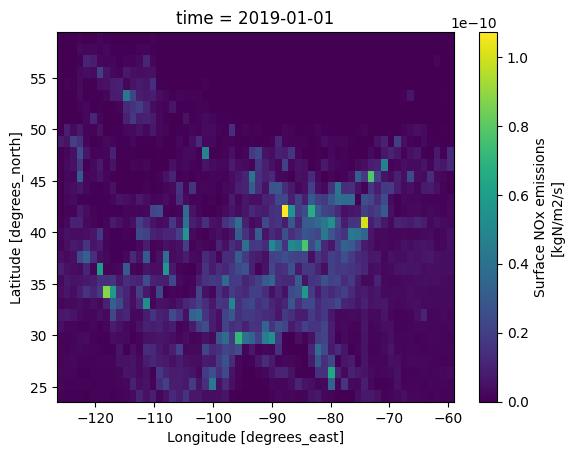

In [69]:
nox.nox[0].plot()

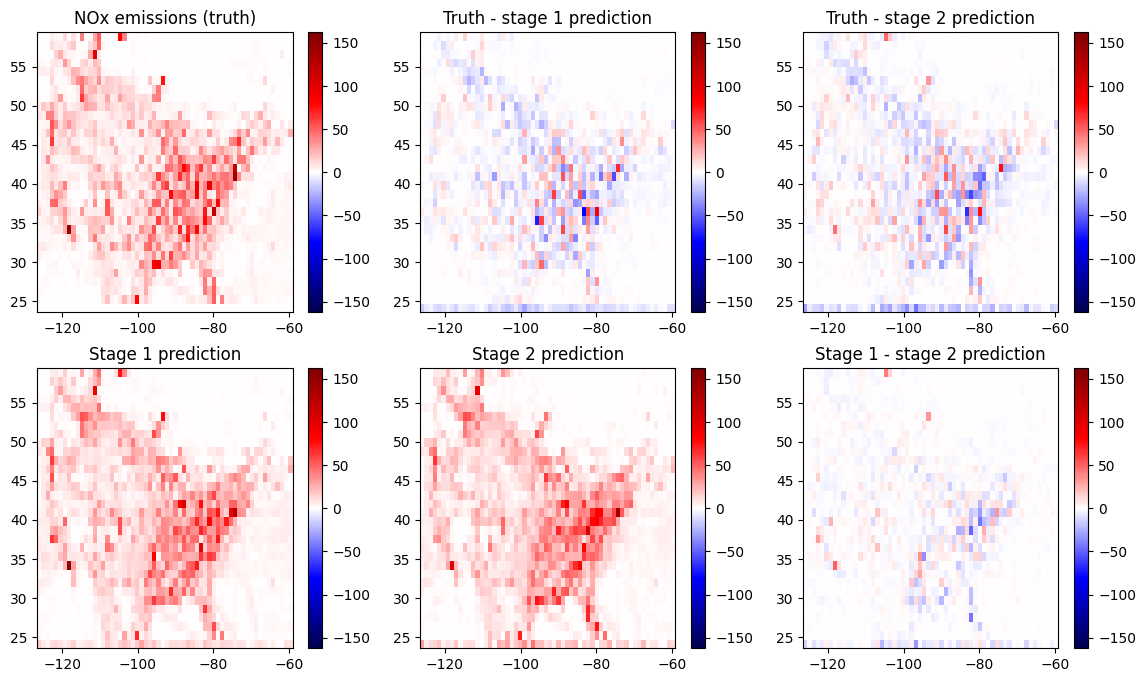

In [129]:
fig, ax = plt.subplots(2,3,figsize=(14,8))
truth_us = truth[:,latmin:latmax,lonmin:lonmax,:]
stage1_us = stage1[:,latmin:latmax,lonmin:lonmax,:]
stage2_us = stage2[:,latmin:latmax,lonmin:lonmax,:]

vmin = np.min(np.concatenate([truth_us,stage1_us,stage2_us]))
vmax = np.max(np.concatenate([truth_us,stage1_us,stage2_us]))
halfrange = np.max(np.abs([vmin,vmax]))/2

day = 200  #day of the year to look at
plt.sca(ax[0,0])
plt.pcolormesh(lon_us,lat_us,truth_us[day,:,:,0],cmap=plt.cm.seismic,norm=mpl.colors.CenteredNorm(halfrange=halfrange))  
plt.title('NOx emissions (truth)')
plt.colorbar()
plt.sca(ax[0,1])
plt.pcolormesh(lon_us,lat_us,truth_us[day,:,:,0]-stage1_us[day,:,:,0],norm=mpl.colors.CenteredNorm(halfrange=halfrange),cmap=plt.cm.seismic)  
plt.title('Truth - stage 1 prediction')
plt.colorbar()
plt.sca(ax[0,2])
plt.pcolormesh(lon_us,lat_us,truth_us[day,:,:,0]-stage2_us[day,:,:,0],norm=mpl.colors.CenteredNorm(halfrange=halfrange),cmap=plt.cm.seismic)  
plt.title('Truth - stage 2 prediction')
plt.colorbar()
plt.sca(ax[1,0])
plt.pcolormesh(lon_us,lat_us,stage1_us[day,:,:,0],cmap=plt.cm.seismic,norm=mpl.colors.CenteredNorm(halfrange=halfrange))  
plt.title('Stage 1 prediction')
plt.colorbar()
plt.sca(ax[1,1])
plt.pcolormesh(lon_us,lat_us,stage2_us[day,:,:,0],cmap=plt.cm.seismic,norm=mpl.colors.CenteredNorm(halfrange=halfrange))  
plt.title('Stage 2 prediction')
plt.colorbar()
plt.sca(ax[1,2])
plt.pcolormesh(lon_us,lat_us,stage1_us[day,:,:,0]-stage2_us[day,:,:,0],norm=mpl.colors.CenteredNorm(halfrange=halfrange),cmap=plt.cm.seismic)  
plt.title('Stage 1 - stage 2 prediction')
plt.colorbar()

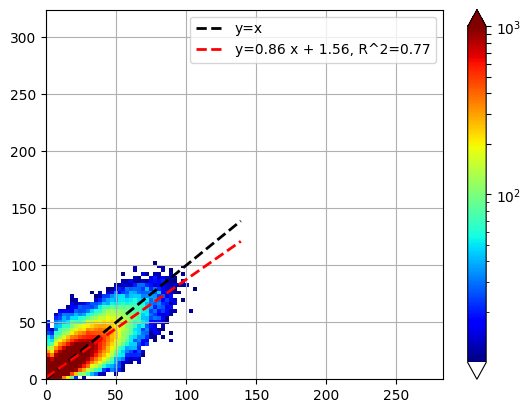

In [128]:
#same as above but now only where we actually have NOx data. The R^2 is better now but still not as good as for the Chinese version.
#possibly because the model is confused about the missing data

truths = truth_us.flatten()
preds = stage1_us.flatten()

slope, intercept, r_value, p_value, std_err = linregress(truths, preds)

xx = np.arange(0, 140, 1)

fig = plt.figure()

my_cmap = plt.cm.jet
my_cmap.set_under('w', 1)

plt.hist2d(truths, preds, bins=100, norm=mpl.colors.LogNorm(vmax=1000, vmin=10), cmap=plt.cm.jet)
# plt.xlim((0, 20))
# plt.ylim((0, 20))
plt.plot(xx, xx, 'k--', lw=2, label='y=x')

plt.plot(xx, slope*xx+intercept, 'r--', lw=2, label='y=%.2f x + %.2f, R^2=%.2f'%(slope, intercept, r_value**2))

plt.colorbar(extend='both', ticks=[0.1, 0] + list(range(0, 1100, 100)) )
plt.legend()
plt.grid()